# Synthetic images and their diffraction patterns

## Objectives

- Perform the **Discrete Fourier Transform (DFT)** on synthetic images representing various apertures to simulate **Fraunhofer diffraction patterns**.
- Apply **convolution via the Fourier Transform** using synthetic aperture images with varying diameters.
- Use **correlation techniques** to match a template with a target image.

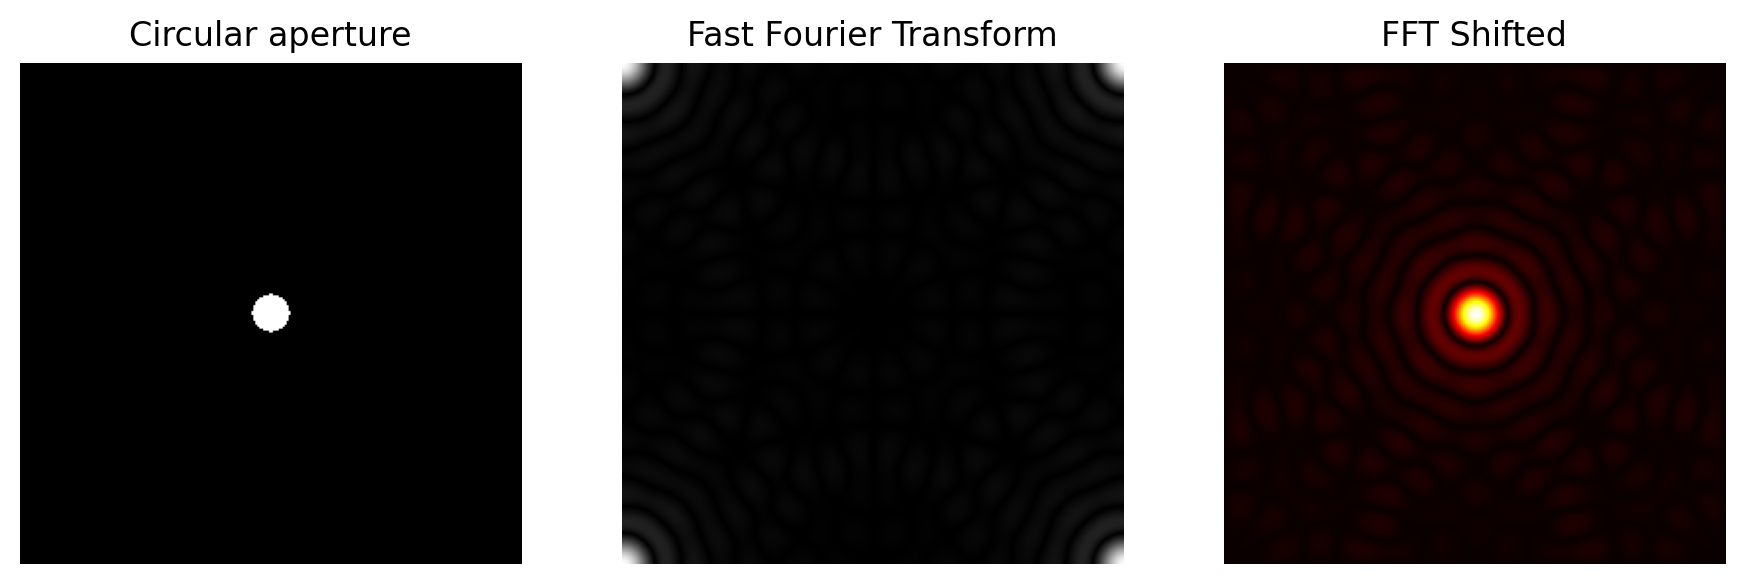

In [15]:
import numpy as np
import matplotlib.pyplot as plt

#circular aperture
plt.rcParams['figure.dpi'] = 200
N = 256
x = np.linspace(-2,2,N)
y = x
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2 + Y**2)
A = np.zeros(np.shape(R))
A[np.where(R<0.15)]=1.0

plt.imsave("circle.png",A.astype(np.uint8),cmap="gray")
#Fourier Transform
FA = np.fft.fft2(A)
FAshifted = np.fft.fftshift(FA)


#Display figures
def plot(A,FA, FAshifted, name):
    fig, axes = plt.subplots(1, 3, figsize=(11,8));
    axes[0].imshow(A, cmap = "gray")
    axes[0].set_title(name)
    axes[1].imshow(abs(FA), cmap = "gray")
    axes[1].set_title("Fast Fourier Transform")
    axes[2].imshow((abs(FAshifted)), cmap = "hot")
    axes[2].set_title("FFT Shifted")
    axes[0].axis('off')
    axes[1].axis('off')
    axes[2].axis('off')
    plt.savefig(name+".png",bbox_inches = 'tight',
        pad_inches = 0)
plot(A,FA, FAshifted, "Circular aperture")

plt.show()

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io

#circular aperture
plt.rcParams['figure.dpi'] = 200
N = 256
x = np.linspace(-2,2,N)
y = x
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2 + Y**2)
A = np.zeros(np.shape(R))
A[np.where(R<0.25)]=1.0

#double slit
double_slit=np.zeros(np.shape(R))
for i in range(len(R)):      
  for j in range(len(R)):
    if i>len(R)/8*3 and i<len(R)*5/8 and j>(len(R)/8*3) and j<(len(R)*5/8):
        double_slit[i,j]=1.0  #generates the 1x1 white square
        if j>(len(R)*0.4) and j<(len(R)*0.6): 
            double_slit[i,j]=0.0 #creates the double slit
k=5            
#Grating
x = np.linspace(-1,1,N)
y = x
X,Y = np.meshgrid(x,y)
def f(x, y):
    return np.sin(2*k*np.pi*x)
Z = f(X, 5)
grating = np.zeros(np.shape(Z))      
grating[np.where(Z>0)] = 1.0 

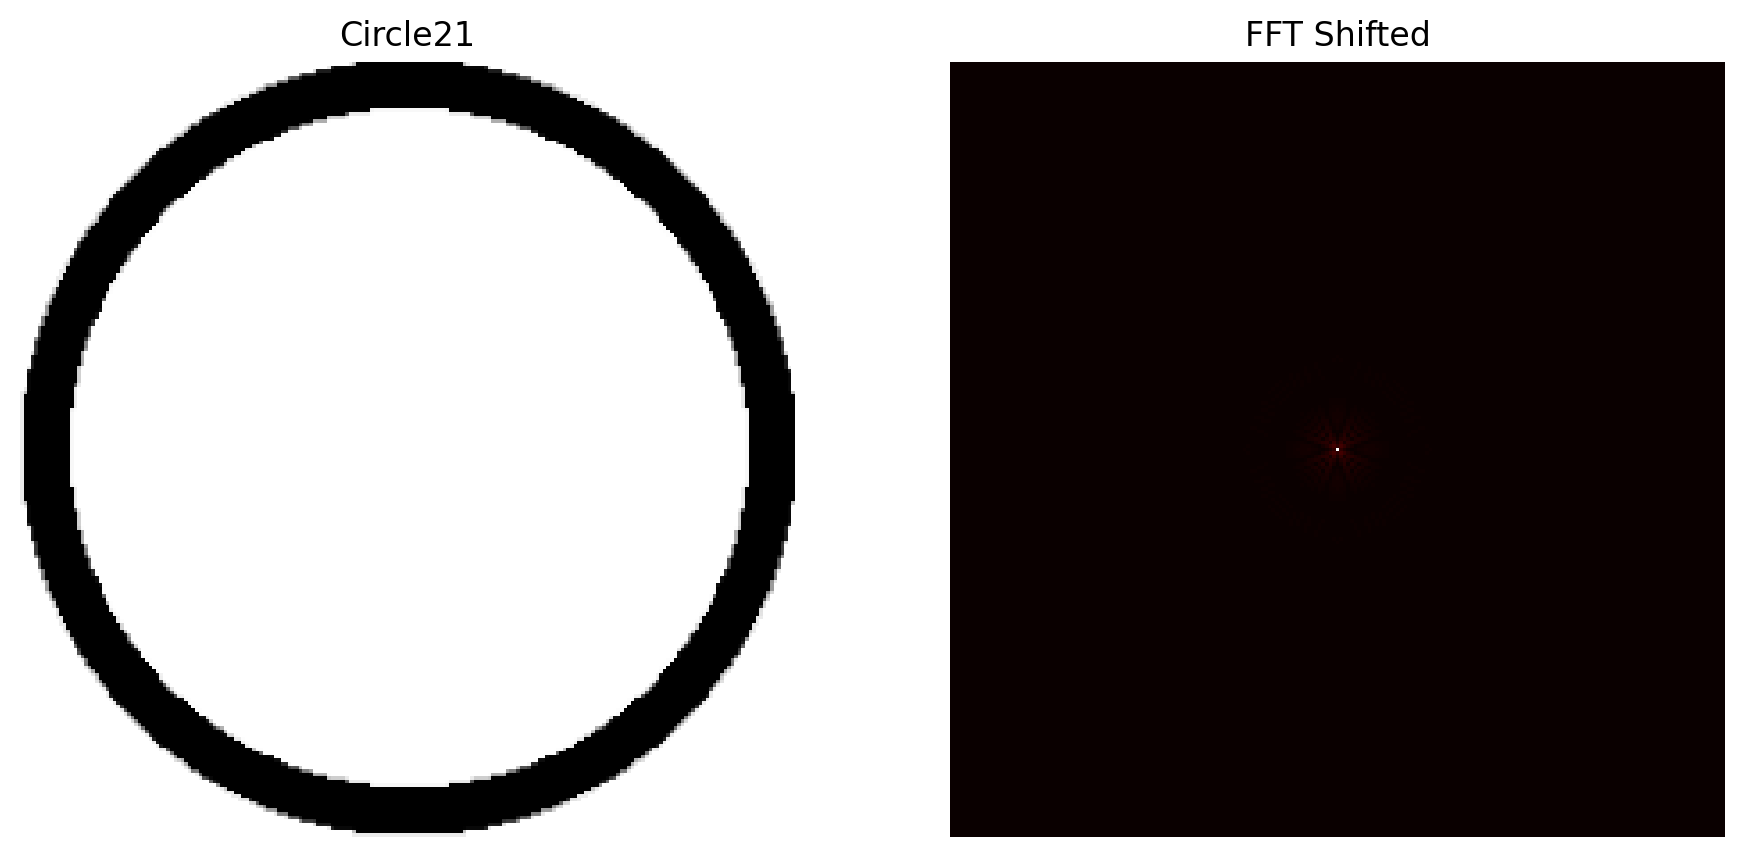

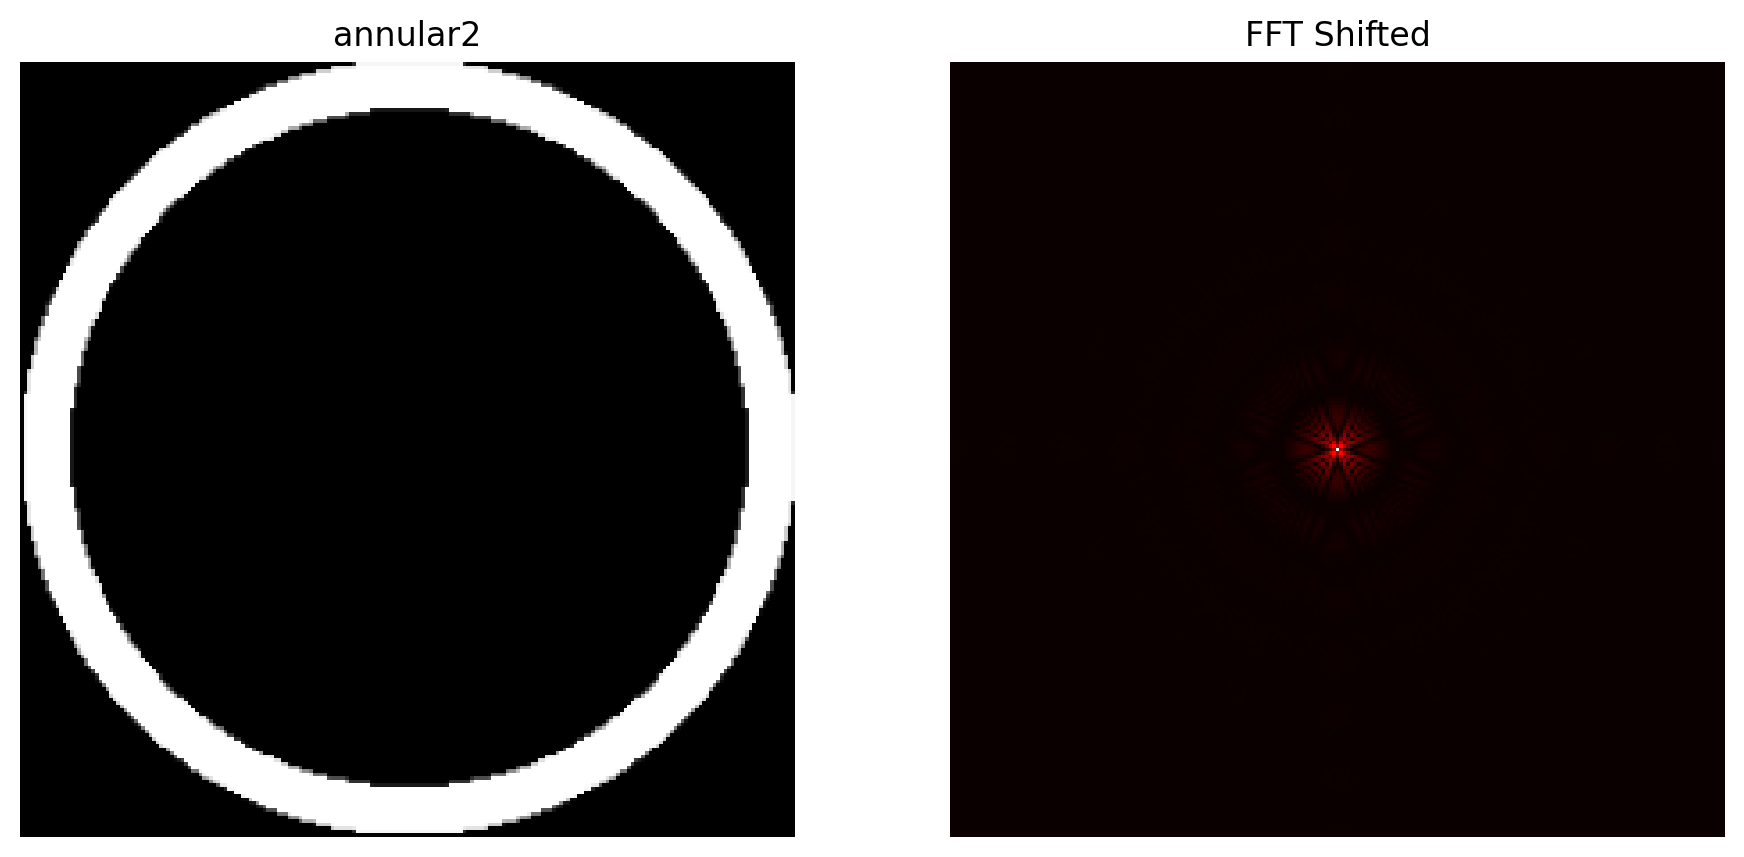

In [39]:
#Tranforms the image
def transform(Img, name):
    #Fourier Transform
    FA = np.fft.fft2(Img)
    FAshifted = np.fft.fftshift(FA)
    #plot
    fig, axes = plt.subplots(1, 2, figsize=(11,8));
    axes[0].imshow(Img, cmap = "gray")
    axes[0].set_title(name)
    axes[1].imshow((abs(FAshifted)), cmap = "hot")
    axes[1].set_title("FFT Shifted")
    axes[0].axis('off')
    axes[1].axis('off')
    plt.savefig(name+".png",bbox_inches = 'tight',
        pad_inches = 0)

#Circular aperture (Gaussian)
synth_img=skimage.color.rgb2gray(skimage.io.imread("circ2.png"))
transform(synth_img,"Circle21")
synth_img=skimage.color.rgb2gray(skimage.io.imread("annulus.png"))
transform(synth_img,"annular2")

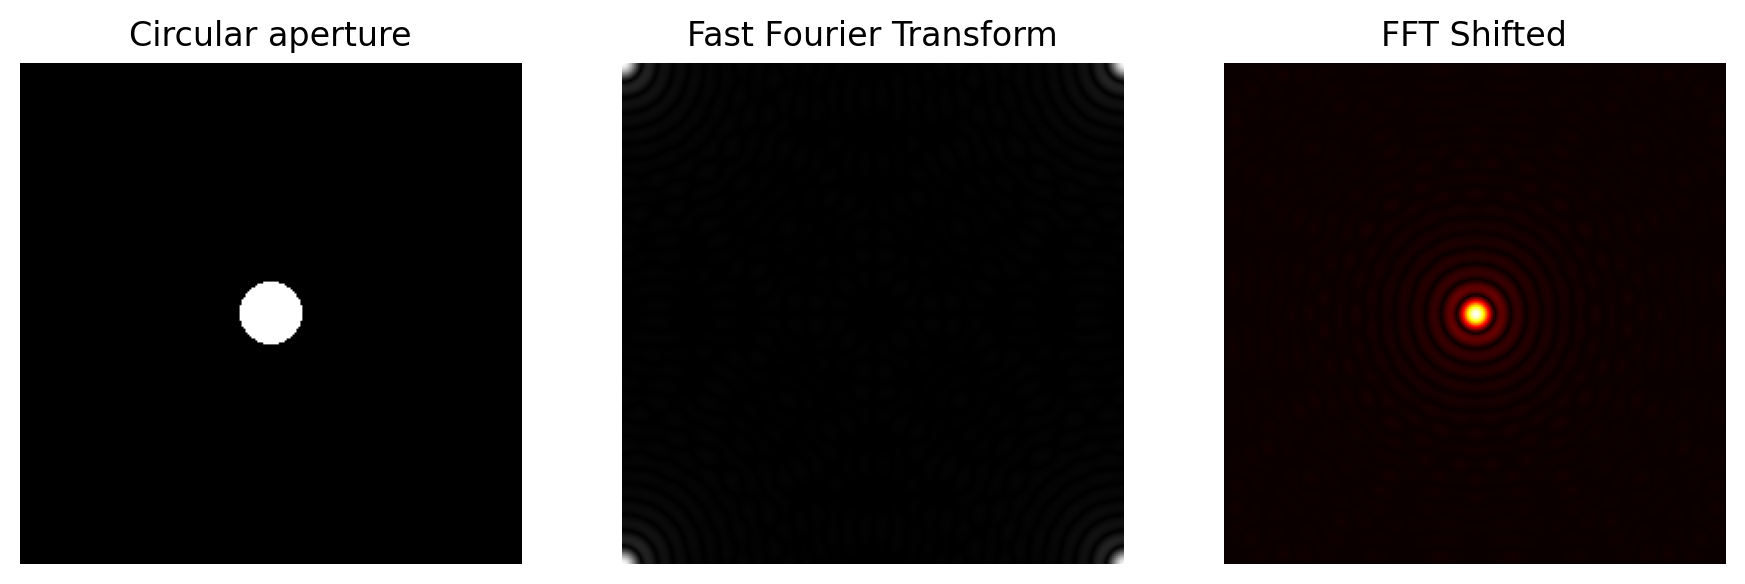

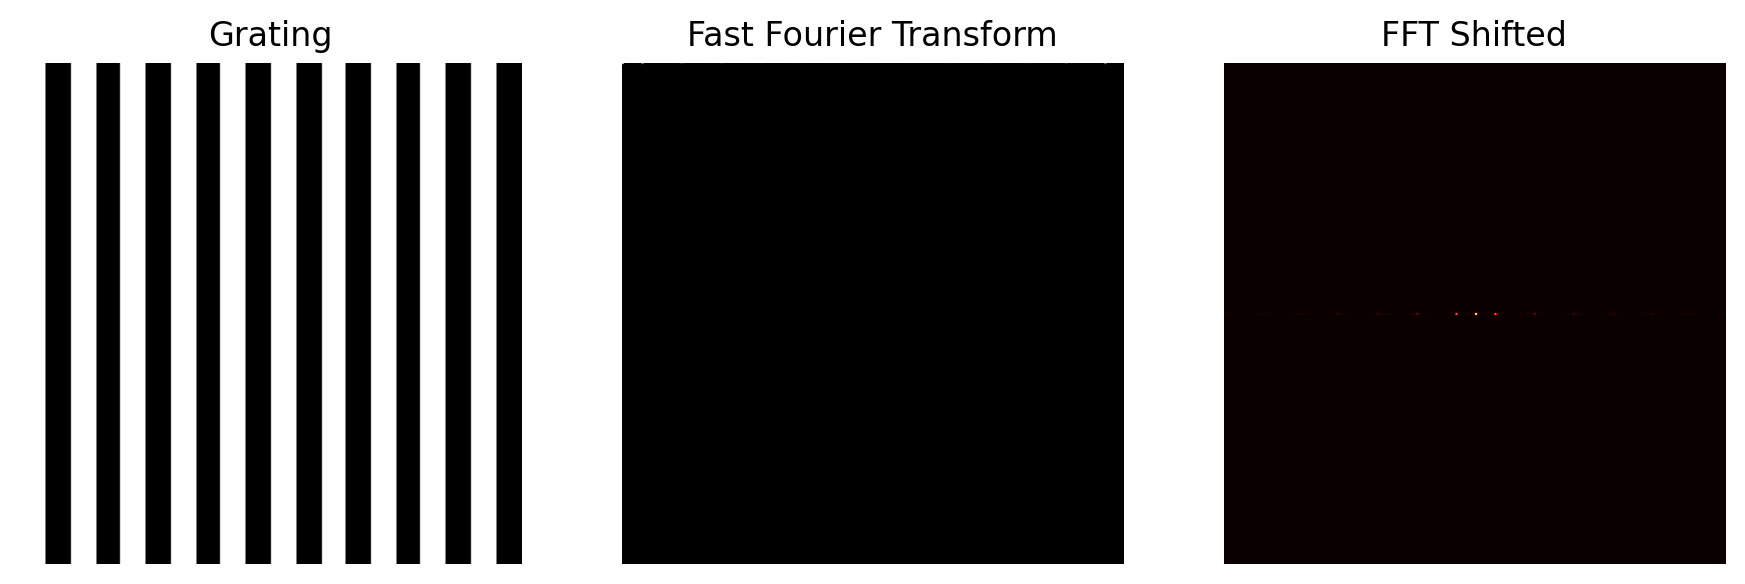

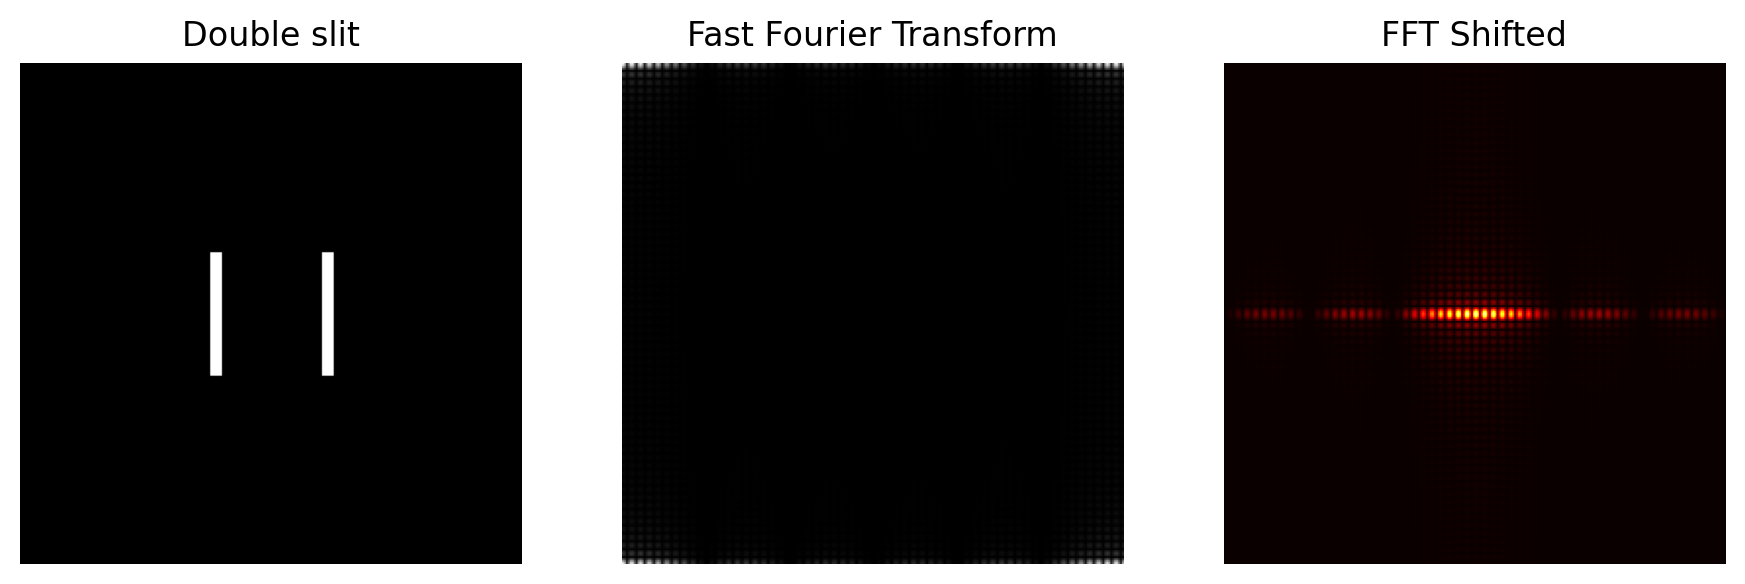

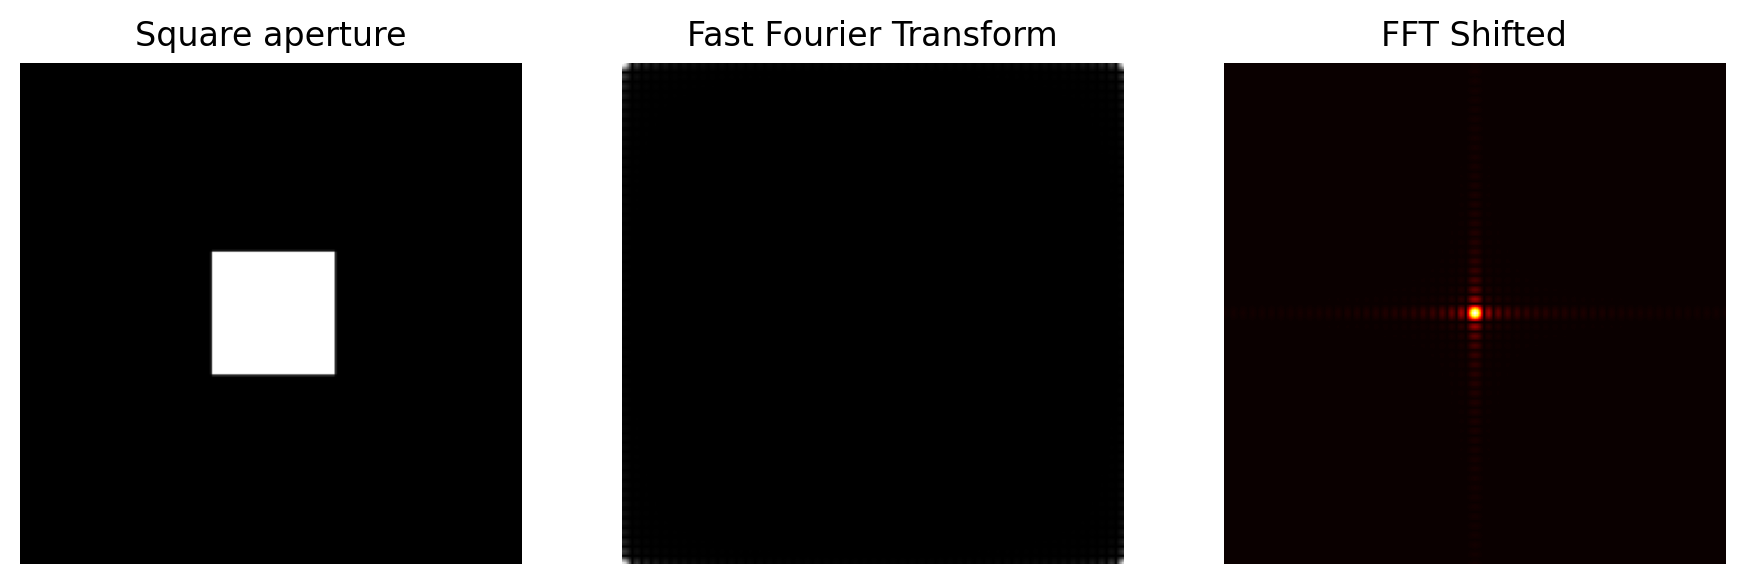

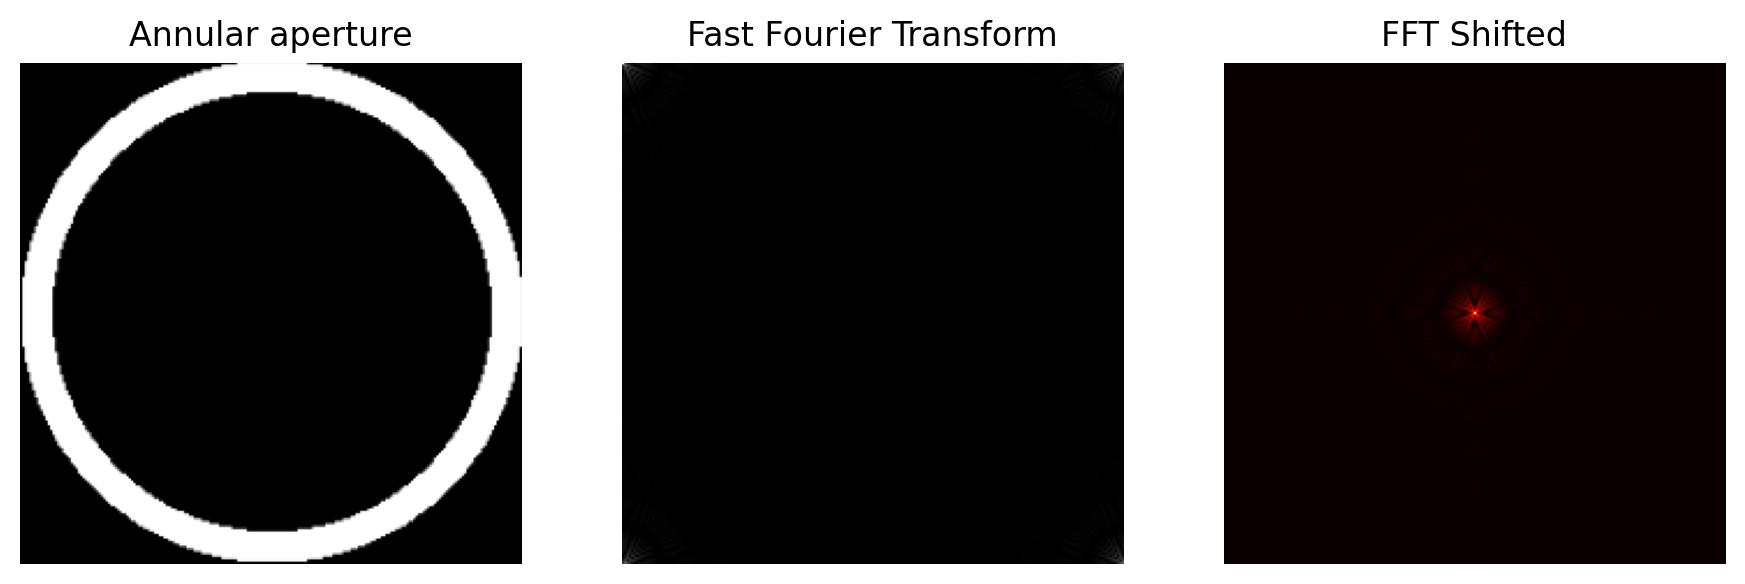

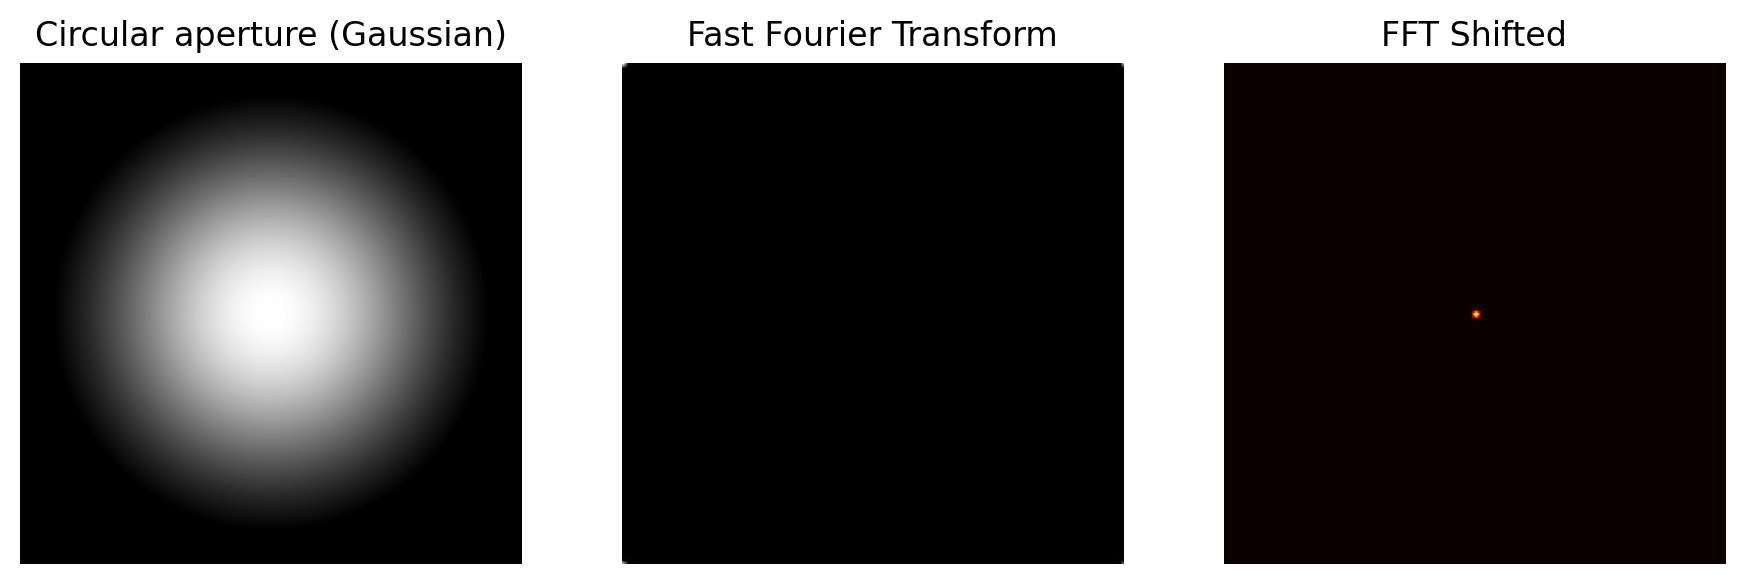

In [35]:
#Tranforms the image
def transform(Img, name):
    #Fourier Transform
    FA = np.fft.fft2(Img)
    FAshifted = np.fft.fftshift(FA)
    #plot
    fig, axes = plt.subplots(1, 3, figsize=(11,8));
    axes[0].imshow(Img, cmap = "gray")
    axes[0].set_title(name)
    axes[1].imshow(abs(FA), cmap = "gray")
    axes[1].set_title("Fast Fourier Transform")
    axes[2].imshow((abs(FAshifted)), cmap = "hot")
    axes[2].set_title("FFT Shifted")
    axes[0].axis('off')
    axes[1].axis('off')
    axes[2].axis('off')
    plt.savefig(name+".png",bbox_inches = 'tight',
        pad_inches = 0)
#Circular aperture:
transform(A,"Circular aperture")
#Grating:    
synth_img=grating
transform(synth_img,"Grating")
#Double slit
synth_img=double_slit
transform(synth_img,"Double slit")
#Square aperture
synth_img=skimage.color.rgb2gray(skimage.io.imread("square.png"))
transform(synth_img,"Square aperture")
#Annular aperture
synth_img=skimage.color.rgb2gray(skimage.io.imread("annulus.png"))
transform(synth_img,"Annular aperture")
#Circular aperture (Gaussian)
synth_img=skimage.color.rgb2gray(skimage.io.imread("Gaussian_2D.png"))
transform(synth_img,"Circular aperture (Gaussian)")

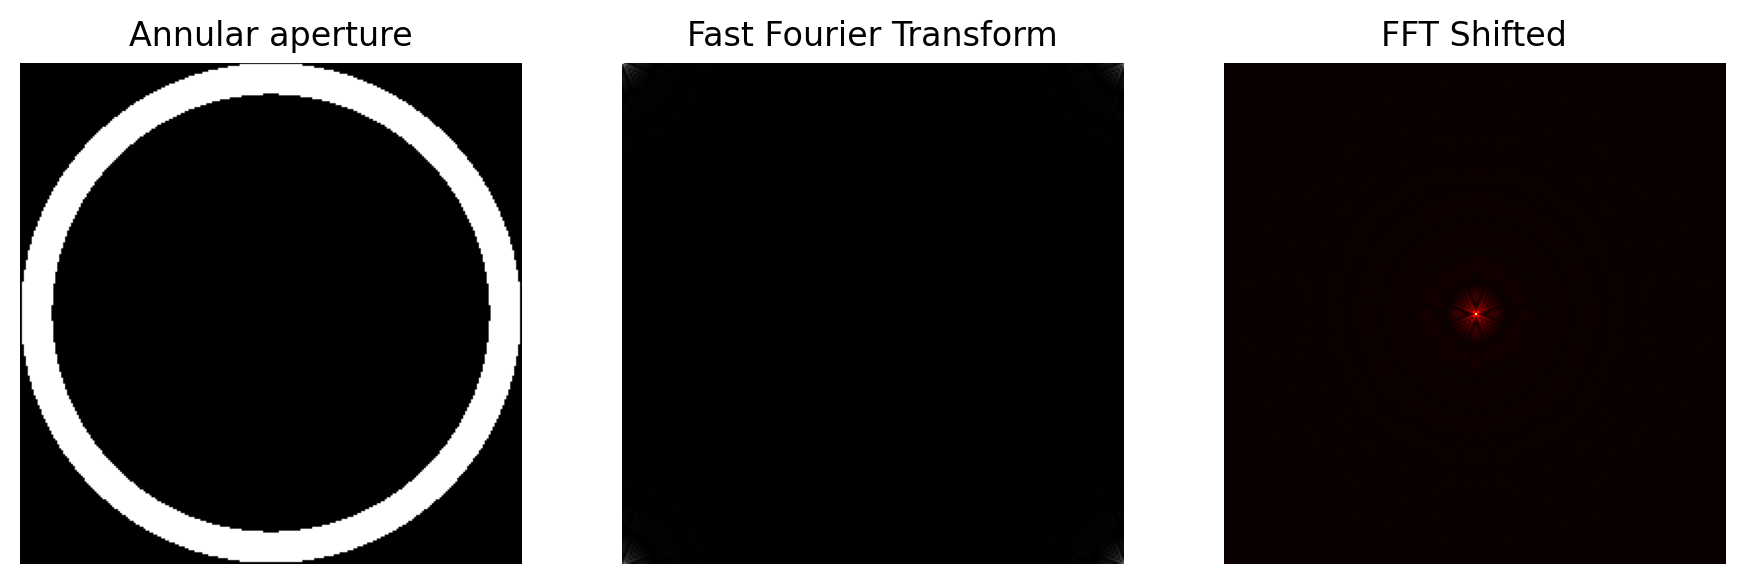

In [12]:
#Annular aperture
N = 256
x = np.linspace(-2,2,num = N)
y = x
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2 + Y**2)
A = np.zeros(np.shape(R))
R_o=2                      #Radius of outer circle
R_i=1.75                    #Radius of inner circle
A[np.where(R<R_o)] = 1.0
A[np.where(R<R_i)] = 0.0

#Fourier Transform
FA = np.fft.fft2(A)
FAshifted = np.fft.fftshift(FA)

#Display figures
plot(A,FA, FAshifted, "Annular aperture")
plt.show()

(-0.5, 199.5, 199.5, -0.5)

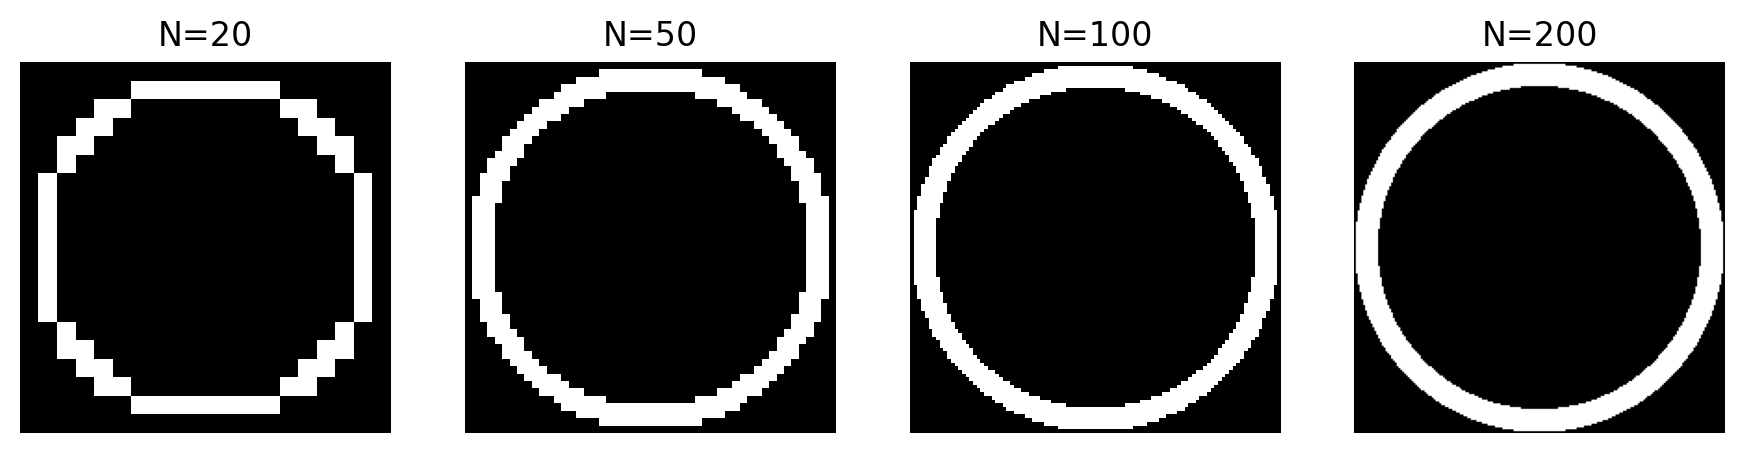

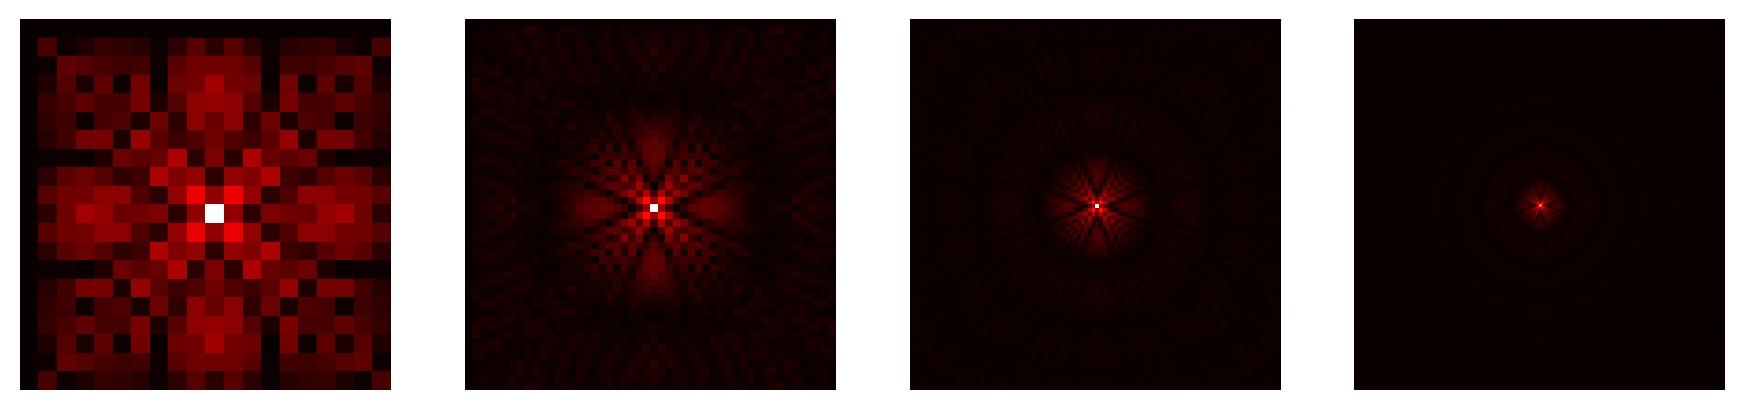

In [13]:
import numpy as np
import math
import matplotlib.pyplot as plt
def annulus(N):
    x = np.linspace(-2,2,num = N)
    y = x
    X,Y = np.meshgrid(x,y)
    R = np.sqrt(X**2 + Y**2)
    A = np.zeros(np.shape(R))
    R_o=2                      #Radius of outer circle
    R_i=1.75                    #Radius of inner circle
    A[np.where(R<R_o)] = 1.0
    A[np.where(R<R_i)] = 0.0
    return A
A,B,C,D=annulus(20),annulus(50),annulus(100),annulus(200)
#plot
fig, axes = plt.subplots(1, 4, figsize=(11,8));
axes[0].imshow(abs(A), cmap = "gray")
axes[0].set_title("N=20")
axes[1].imshow(abs(B), cmap = "gray")
axes[1].set_title("N=50")
axes[2].imshow((abs(C)), cmap = "gray")
axes[2].set_title("N=100")
axes[3].imshow((abs(D)), cmap = "gray")
axes[3].set_title("N=200")
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
axes[3].axis('off')
def trans(A):
    #Fourier Transform
    FA = np.fft.fft2(A)
    FAshifted = np.fft.fftshift(FA)
    return FAshifted
A,B,C,D=trans(A),trans(B),trans(C),trans(D)

#plot
fig, axes = plt.subplots(1, 4, figsize=(11,8));
axes[0].imshow(abs(A), cmap = "hot")
axes[1].imshow(abs(B), cmap = "hot")
axes[2].imshow((abs(C)), cmap = "hot")
axes[3].imshow((abs(D)), cmap = "hot")
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
axes[3].axis('off')
#plt.savefig(name+".png",bbox_inches = 'tight',
 #   pad_inches = 0)

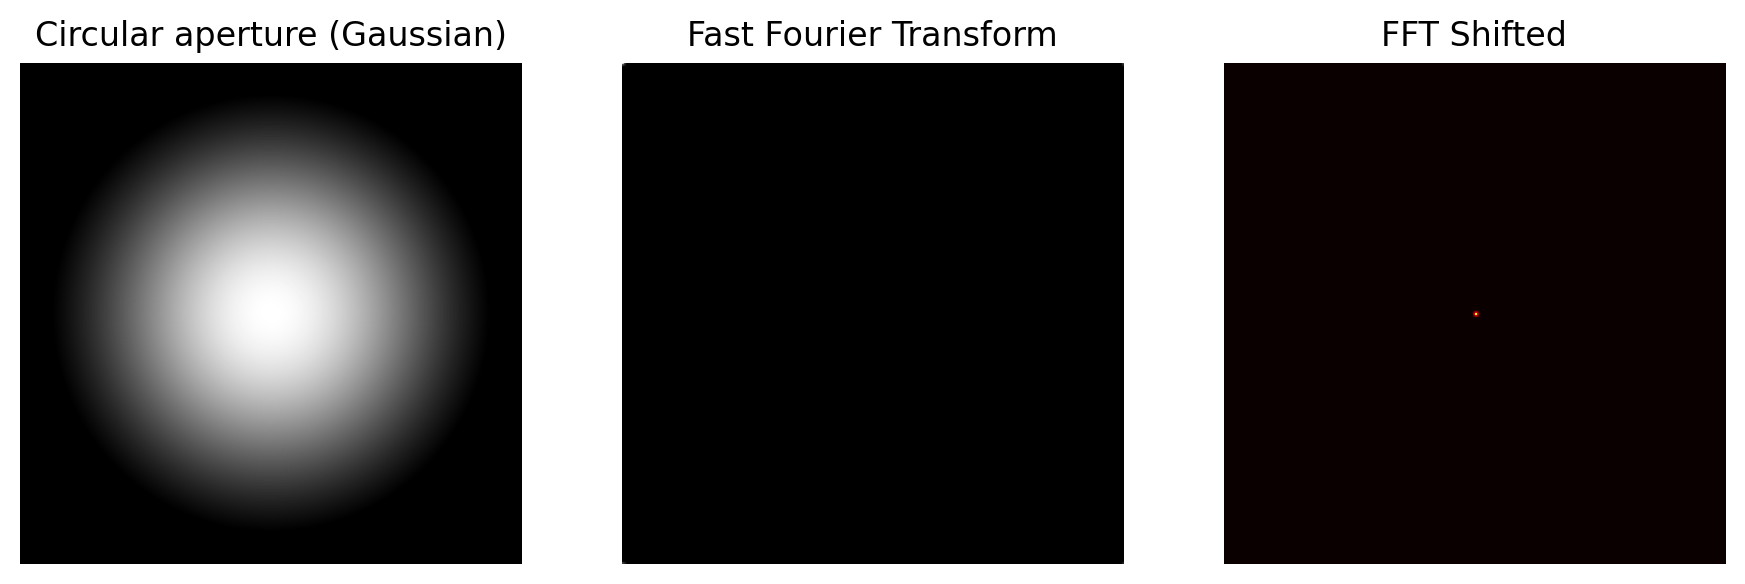

In [14]:
#circular aperture w/ Gaussian transmittance
N = 256
x = np.linspace(-2,2,num = N)
y = x
X,Y = np.meshgrid(x,y) #generates the 2x2 xy-plane
sigma=1                #standard deviation
def Gauss(X,Y):        #Gaussian equation
    return (1/np.sqrt(2*np.pi)/sigma)*np.exp(-( (X) ** 2 + (Y) ** 2 ) 
                                             / (2 * sigma ** 2)) 
circ = np.sqrt(X**2 + Y**2)
D_truncate=1.75     #Radius (in cm) of the distribution before truncation
A=Gauss(X,Y)
A[np.where(circ>(D_truncate))] = Gauss(D_truncate,0)

#Fourier Transform
FA = np.fft.fft2(A)
FAshifted = np.fft.fftshift(FA)

#Display figures
plot(A,FA, FAshifted, "Circular aperture (Gaussian)")
plt.show()

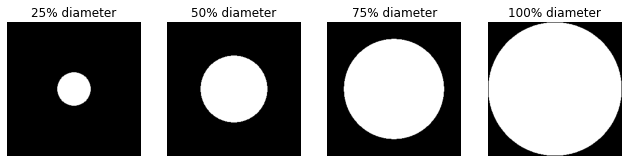

In [2]:
def circ(percent_D):
    N = 256
    x = np.linspace(-2,2,N)
    y = x
    X,Y = np.meshgrid(x,y)
    R = np.sqrt(X**2 + Y**2)
    A = np.zeros(np.shape(R))
    A[np.where(R<(percent_D*2))]=1.0
    return A
D_25P,D_50P,D_75P,D_100P=circ(0.25),circ(0.5),\
                                circ(0.75),circ(1.0)
#Display figures
fig, axes = plt.subplots(1, 4, figsize=(11,8));
axes[0].imshow(D_25P, cmap = "gray")
axes[0].set_title("25% diameter")
axes[1].imshow(D_50P, cmap = "gray")
axes[1].set_title("50% diameter")
axes[2].imshow(D_75P, cmap = "gray")
axes[2].set_title("75% diameter")
axes[3].imshow(D_100P, cmap = "gray")
axes[3].set_title("100% diameter")
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
axes[3].axis('off')
plt.savefig("circs.png",bbox_inches = 'tight',pad_inches = 0)
plt.show()

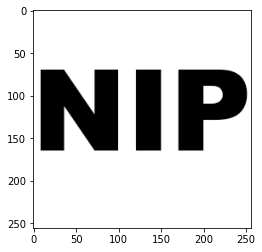

In [3]:
import skimage.io
import matplotlib.pyplot as plt
import numpy as np

Img = skimage.io.imread("157images/NIP.bmp")
plt.imshow(Img,cmap ="gray")

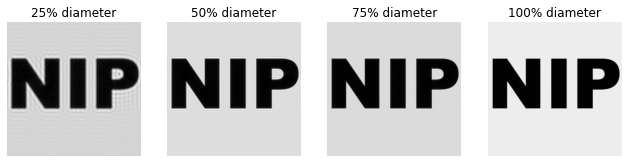

In [9]:
import skimage.io
import matplotlib.pyplot as plt
import numpy as np

Img = skimage.io.imread("157images/NIP.bmp")

def convolve(image,aperture):
    A = aperture
    Ashift = np.fft.fftshift(A) 
    FImg = np.fft.fft2(image[:,:,1])
    H = Ashift*FImg
    h = np.fft.ifft2(H)

    return abs(h)

A,B,C,D=convolve(Img,D_25P),convolve(Img,D_50P),\
            convolve(Img,D_75P),convolve(Img,D_100P)
#Display figures
fig, axes = plt.subplots(1, 4, figsize=(11,8));
axes[0].imshow(A, cmap = "gray")
axes[0].set_title("25% diameter")
axes[1].imshow(B, cmap = "gray")
axes[1].set_title("50% diameter")
axes[2].imshow(C, cmap = "gray")
axes[2].set_title("75% diameter")
axes[3].imshow(D, cmap = "gray")
axes[3].set_title("100% diameter")
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
axes[3].axis('off')
plt.savefig("convolved.png",bbox_inches = 'tight',pad_inches = 0)
plt.show()

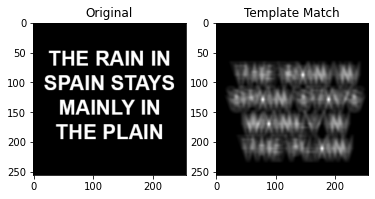

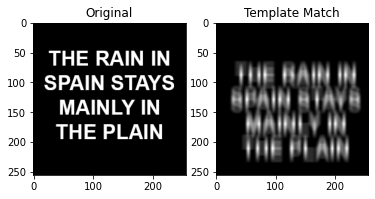

In [8]:
A = skimage.color.rgb2gray(skimage.io.imread("157images/A.bmp"))
                                                            #template image
I = skimage.color.rgb2gray(skimage.io.imread("157images/I.bmp"))
                                                            #template image
Img = skimage.color.rgb2gray(skimage.io.imread("157images/the rain.bmp"))
                                                            #phrase image
def template_match(image,template):
    FImg = np.fft.fft2(image)
    AFFT = np.fft.fft2(template)
    P = np.conjugate(FImg)*AFFT
    smallp = np.fft.fft2(P)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(Img,cmap="gray")
    ax1.set_title("Original")
    ax2.imshow(np.fft.fftshift(abs(smallp)),cmap="gray")
    ax2.set_title("Template Match")
    plt.show()
template_match(Img,A) #template match "A"
template_match(Img,I) #template match "I"

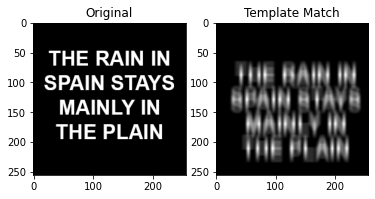

In [4]:
A = skimage.color.rgb2gray(skimage.io.imread("157images/I.bmp"))
                                                            #template image
Img = skimage.color.rgb2gray(skimage.io.imread("157images/the rain.bmp"))
                                                            #phrase image
FImg = np.fft.fft2(Img)
AFFT = np.fft.fft2(A) 
P = np.conjugate(FImg)*AFFT
smallp = np.fft.fft2(P)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(Img,cmap="gray")
ax1.set_title("Original")
ax2.imshow(np.fft.fftshift(abs(smallp)),cmap="gray")
ax2.set_title("Template Match")
plt.savefig("template matach I.png",bbox_inches = 'tight',pad_inches = 0)
plt.show()